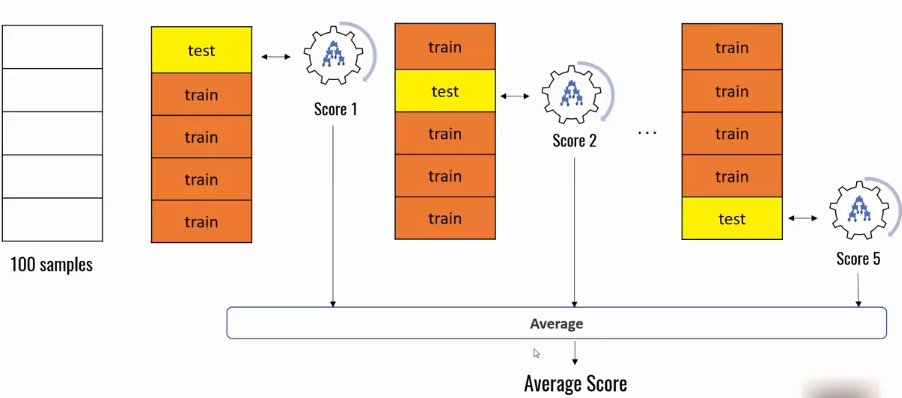

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [34]:
lr = LogisticRegression(max_iter=5000, solver='sag')
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.95

In [35]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9833333333333333

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9574074074074074

In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [38]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [39]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [40]:
print(get_score(lr, X_train, X_test, y_train, y_test))
print(get_score(svm, X_train, X_test, y_train, y_test))
print(get_score(rf, X_train, X_test, y_train, y_test))

0.95
0.9833333333333333
0.9703703703703703


In [41]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [44]:
score_lr = []
score_svm = []
score_rf = []

for train_index,test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
    score_lr.append(get_score(LogisticRegression(max_iter=5000, solver='sag'),X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(n_estimators=40),X_train, X_test, y_train, y_test))
print(score_lr)
print(score_svm)
print(score_rf)

[0.9232053422370617, 0.9398998330550918, 0.9115191986644408]
[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]
[0.9315525876460768, 0.9499165275459098, 0.9248747913188647]


In [45]:
from sklearn.model_selection import cross_val_score

In [47]:
cross_val_score(LogisticRegression(max_iter=5000, solver='sag'),digits.data,digits.target)

array([0.91944444, 0.86944444, 0.94707521, 0.93593315, 0.89972145])

In [49]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [50]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data,digits.target)

array([0.92777778, 0.90555556, 0.94986072, 0.95543175, 0.91643454])